## Ethereum Data Preparation


In [1]:
import numpy as np
import pandas as pd
import hvplot.pandas
from datetime import datetime, date
from functools import reduce

In [2]:
# Load the fear and greed sentiment data for Bitcoin (only fear and greed index)
fng_df = pd.read_csv('fng.csv')
fng_df = fng_df.rename(columns={'date':'Date', 'value_classification':'fng_class'})
fng_df = fng_df.drop(columns=['value'])
mapping = {'Extreme Fear':'-1.0', 'Fear':'-0.5', 'Neutral':'0.0', 
        'Greed':'0.5', 'Extreme Greed':'1.0'}
fng_df['fng_class'] = fng_df['fng_class'].map(mapping)
fng_df['fng_class'] = pd.to_numeric(fng_df['fng_class'])
fng_df['fng_class'] = fng_df['fng_class'].astype(float)
fng_df.head()

,Date,fng_class
0,2021-01-16,1.0
1,2021-01-15,1.0
2,2021-01-14,1.0
3,2021-01-13,1.0
4,2021-01-12,1.0


In [3]:
fng_df.set_index(['Date'], inplace=True)
fng_df.head()

,fng_class
Date,
2021-01-16,1.0
2021-01-15,1.0
2021-01-14,1.0
2021-01-13,1.0
2021-01-12,1.0


In [4]:
# Load the vader sentiment data for Ethereum
eth_vader_df = pd.read_csv('eth_vader.csv', infer_datetime_format=True, parse_dates=True)
eth_vader_df["Publish Date"] = [date[0:10] for date in eth_vader_df["Publish Date"]]
eth_vader_df = eth_vader_df.drop(columns=["Post ID", "Title", "Url", "Author", "Score", "Total No. of Comments", "Permalink",
        "title_pos", "title_neu", "title_neg", "title_sent"], axis=1)
eth_vader_df.rename(columns = {'Publish Date':'Date', 'title_compound': 'vader_compound'}, inplace = True)
eth_vader_df['vader_compound'] = eth_vader_df['vader_compound'].astype(float).round(decimals=2)
eth_vader_df.head()

,Date,vader_compound
0,2019-01-24,0.20
1,2019-02-05,0.00
2,2019-02-06,-0.59
3,2019-02-13,0.00
4,2019-02-13,0.00


In [5]:
eth_vader_df.set_index(['Date'], inplace=True)
eth_vader_df.head()

,vader_compound
Date,
2019-01-24,0.20
2019-02-05,0.00
2019-02-06,-0.59
2019-02-13,0.00
2019-02-13,0.00


In [6]:
# Load the historical closing prices for Ethereum
eth_close_df = pd.read_csv('ethprices.csv')
eth_close_df = eth_close_df.sort_index()
eth_close_df = eth_close_df.rename(columns={'date':'Date', 'close':'close_price'})
eth_close_df = eth_close_df.drop(["symbol", "volume"], axis=1)
eth_close_df.head()

,Date,close_price
0,2019-01-28,105.43
1,2019-01-29,104.01
2,2019-01-30,107.50
3,2019-01-31,105.74
4,2019-02-01,105.69


In [7]:
eth_close_df.set_index(['Date'], inplace=True)
eth_close_df.head()

,close_price
Date,
2019-01-28,105.43
2019-01-29,104.01
2019-01-30,107.50
2019-01-31,105.74
2019-02-01,105.69


In [8]:
# Load the exponential weighted moving average data for Ethereum
eth_ewm_df = pd.read_csv('eth_ema.csv')
eth_ewm_df = eth_ewm_df.sort_index()
eth_ewm_df = eth_ewm_df.rename(columns={'date':'Date', 'crossover_signal':'ewm_cross_signal'})
eth_ewm_df = eth_ewm_df.drop(["symbol", "close", "volume", "daily_return", "fast_close", "slow_close", "crossover_long", "crossover_short"], axis=1)
eth_ewm_df['ewm_cross_signal'] = eth_ewm_df['ewm_cross_signal'].astype(float)
eth_ewm_df.head()

,Date,ewm_cross_signal
0,2019-01-28,0.0
1,2019-01-29,-1.0
2,2019-01-30,1.0
3,2019-01-31,1.0
4,2019-02-01,1.0


In [9]:
eth_ewm_df.set_index(['Date'], inplace=True)
eth_ewm_df.head()

,ewm_cross_signal
Date,
2019-01-28,0.0
2019-01-29,-1.0
2019-01-30,1.0
2019-01-31,1.0
2019-02-01,1.0


In [10]:
# Load the money flow index for Ethereum
eth_mfi_df = pd.read_csv('mfi_eth.csv')
eth_mfi_df = eth_mfi_df.sort_index()
eth_mfi_df = eth_mfi_df.rename(columns={'date':'Date'})
eth_mfi_df = eth_mfi_df.drop(["symbol", "close", "volume", "Buy", "Sell"], axis=1)
eth_mfi_df['MFI'] = eth_mfi_df['MFI'].round(decimals=2)
eth_mfi_df.head()

,Date,MFI
0,2019-02-11,39.15
1,2019-02-12,49.83
2,2019-02-13,43.22
3,2019-02-14,45.43
4,2019-02-15,53.56


In [11]:
eth_mfi_df.set_index(['Date'], inplace=True)
eth_mfi_df.head()

,MFI
Date,
2019-02-11,39.15
2019-02-12,49.83
2019-02-13,43.22
2019-02-14,45.43
2019-02-15,53.56


In [12]:
# Load the money flow index for Ethereum
eth_google_df = pd.read_csv('eth_google.csv')
eth_google_df = eth_google_df.sort_index()
eth_google_df = eth_google_df.rename(columns={'Google Search Count':'google_search_count'})
eth_google_df['google_search_count'] = eth_google_df['google_search_count'].astype(float)
eth_google_df.head()

,Date,google_search_count
0,2019-01-28,5.0
1,2019-01-29,5.0
2,2019-01-30,5.0
3,2019-01-31,5.0
4,2019-02-01,5.0


In [13]:
eth_google_df.set_index(['Date'], inplace=True)
eth_google_df.head()

,google_search_count
Date,
2019-01-28,5.0
2019-01-29,5.0
2019-01-30,5.0
2019-01-31,5.0
2019-02-01,5.0


In [14]:
eth_vader_df['vader_compound'] = eth_vader_df['vader_compound'].replace (np.nan, 0)
eth_vader_df.head()

,vader_compound
Date,
2019-01-24,0.20
2019-02-05,0.00
2019-02-06,-0.59
2019-02-13,0.00
2019-02-13,0.00


In [15]:
# MERGE the closing price, ewm, fng, mfi, and Google DataFrames into a single DataFrame
eth_dfs = [eth_close_df, eth_ewm_df, fng_df, eth_mfi_df, eth_google_df]
eth_data_df = reduce(lambda left, right: pd.merge(left, right, on='Date'), eth_dfs)
eth_df = eth_data_df.merge(eth_vader_df, on = 'Date', how = 'left')
eth_df.replace(np.nan, 0)
eth_df.head()

,close_price,ewm_cross_signal,fng_class,MFI,google_search_count,vader_compound
Date,,,,,,
2019-02-11,119.52,1.0,-0.5,39.15,7.0,NaN
2019-02-12,121.18,1.0,-0.5,49.83,7.0,NaN
2019-02-13,120.58,1.0,0.0,43.22,7.0,0.0
2019-02-13,120.58,1.0,0.0,43.22,7.0,0.0
2019-02-14,119.37,1.0,0.0,45.43,7.0,NaN


In [16]:
eth_df['vader_compound'] = eth_df['vader_compound'].fillna(0)
eth_df.head()

,close_price,ewm_cross_signal,fng_class,MFI,google_search_count,vader_compound
Date,,,,,,
2019-02-11,119.52,1.0,-0.5,39.15,7.0,0.0
2019-02-12,121.18,1.0,-0.5,49.83,7.0,0.0
2019-02-13,120.58,1.0,0.0,43.22,7.0,0.0
2019-02-13,120.58,1.0,0.0,43.22,7.0,0.0
2019-02-14,119.37,1.0,0.0,45.43,7.0,0.0


In [17]:
# Load the gas price data for Ethereum
eth_gas_df = pd.read_csv('eth_gas_price.csv')
eth_gas_df = eth_gas_df.sort_index()
eth_gas_df["f0_"] = [date[0:10] for date in eth_gas_df["f0_"]]
eth_gas_df = eth_gas_df.rename(columns={'f0_':'Date'})
eth_gas_df["std_gas"] = (eth_gas_df['f1_'] - eth_gas_df['f1_'].min())/(eth_gas_df['f1_'].max() - eth_gas_df['f1_'].min())
eth_gas_df.head()

,Date,f1_,std_gas
0,2020-05-31,2.412045e+16,0.027868
1,2019-11-04,1.009714e+16,0.009252
2,2019-07-19,1.411999e+16,0.014593
3,2019-09-02,1.206192e+16,0.011860
4,2019-05-24,1.359907e+16,0.013901


In [18]:
eth_gas_df.set_index(['Date'], inplace=True)
eth_gas_df = eth_gas_df.drop(columns=['f1_'], axis=1)
eth_gas_df.head()

,std_gas
Date,
2020-05-31,0.027868
2019-11-04,0.009252
2019-07-19,0.014593
2019-09-02,0.011860
2019-05-24,0.013901


In [19]:
# Load the mining difficulty data for Ethereum
eth_diff_df = pd.read_csv('mining_diff.csv')
eth_diff_df = eth_diff_df.sort_index()
eth_diff_df["f0_"] = [date[0:10] for date in eth_diff_df["f0_"]]
eth_diff_df = eth_diff_df.rename(columns={'f0_':'Date'})
eth_diff_df = eth_diff_df.sort_index()
eth_diff_df['f1_'] = eth_diff_df['f1_'].astype(float)
eth_diff_df["std_diff"] = (eth_diff_df['f1_'] - eth_diff_df['f1_'].min())/(eth_diff_df['f1_'].max() - eth_diff_df['f1_'].min())
eth_diff_df.head()

,Date,f1_,std_diff
0,2019-02-08,1.167596e+19,0.408881
1,2020-12-07,2.343569e+19,0.848444
2,2019-01-11,1.498385e+19,0.532525
3,2020-01-30,1.327609e+19,0.468691
4,2019-05-15,1.311831e+19,0.462793


In [20]:
eth_diff_df.set_index(['Date'], inplace=True)
eth_diff_df = eth_diff_df.drop(columns=['f1_'], axis=1)
eth_diff_df.head()

,std_diff
Date,
2019-02-08,0.408881
2020-12-07,0.848444
2019-01-11,0.532525
2020-01-30,0.468691
2019-05-15,0.462793


In [21]:
# Load the actual ethereum value (transfers) data for Ethereum (volume of transactions by day)
eth_value_df = pd.read_csv('actual_eth_value.csv') #, index_col="date", infer_datetime_format=True, parse_dates=True)
eth_value_df = eth_value_df.sort_index()
eth_value_df["f0_"] = [date[0:10] for date in eth_value_df["f0_"]]
eth_value_df = eth_value_df.rename(columns={'f0_':'Date'})
eth_value_df['f1_'] = eth_value_df['f1_'].astype(float)
eth_value_df["std_value"] = (eth_value_df['f1_'] - eth_value_df['f1_'].min())/(eth_value_df['f1_'].max() - eth_value_df['f1_'].min())
eth_value_df.head()

,Date,f1_,std_value
0,2019-04-24,3.490000e+24,0.366645
1,2019-04-03,4.170000e+24,0.441157
2,2020-08-12,4.200000e+24,0.444444
3,2020-09-01,6.880000e+24,0.738111
4,2021-01-17,1.440000e+23,0.000000


In [22]:
eth_value_df.set_index(['Date'], inplace=True)
eth_value_df = eth_value_df.drop(columns=['f1_'], axis=1)
eth_value_df.head()

,std_value
Date,
2019-04-24,0.366645
2019-04-03,0.441157
2020-08-12,0.444444
2020-09-01,0.738111
2021-01-17,0.000000


In [23]:
# MERGE the mining data into a single DataFrame
dfs = [eth_diff_df, eth_gas_df, eth_value_df]
eth_mining_df = reduce(lambda left, right: pd.merge(left, right, on='Date'), dfs)
eth_string_time = "2019-02-08"
eth_datetime = datetime.strptime(eth_string_time, "%Y-%m-%d")
eth_mining_df.rename(columns = {'f0_':'Date', 'std_diff':'mining_difficulty', 'std_gas': 'gas_price', 'std_value':'total_transfers' }, inplace = True)
eth_mining_df.head()

,mining_difficulty,gas_price,total_transfers
Date,,,
2019-02-08,0.408881,0.004171,0.219812
2020-12-07,0.848444,0.069152,0.285558
2019-01-11,0.532525,0.005648,0.410476
2020-01-30,0.468691,0.002642,0.133246
2019-05-15,0.462793,0.014140,0.465264


In [24]:
eth_master_df = eth_df.merge(eth_mining_df, on = 'Date', how = 'left')
eth_master_df.head()

,close_price,ewm_cross_signal,fng_class,MFI,google_search_count,vader_compound,mining_difficulty,gas_price,total_transfers
Date,,,,,,,,,
2019-02-11,119.52,1.0,-0.5,39.15,7.0,0.0,0.410002,0.003789,0.193513
2019-02-12,121.18,1.0,-0.5,49.83,7.0,0.0,0.426929,0.003408,0.152970
2019-02-13,120.58,1.0,0.0,43.22,7.0,0.0,0.410910,0.004773,0.182555
2019-02-13,120.58,1.0,0.0,43.22,7.0,0.0,0.410910,0.004773,0.182555
2019-02-14,119.37,1.0,0.0,45.43,7.0,0.0,0.402840,0.007891,0.167215


---

## Random Forest Regressor for Multiple Features

In [26]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
#from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.datasets import load_boston
#import shap
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


Bad key "text.kerning_factor" on line 4 in
C:\Users\andre\anaconda3\envs\dev\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


### Fitting and Predicting

In [27]:
# Define features set and target vector
dataset = eth_master_df
X = eth_master_df[['mining_difficulty', 'ewm_cross_signal','fng_class','MFI','google_search_count', 'vader_compound', 'gas_price', 'total_transfers']]
y = eth_master_df['close_price'].ravel()

In [28]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
X_train, X_test= np.split(X, [int(.8 *len(X))])
y_train, y_test= np.split(y, [int(.8 *len(y))])

In [29]:
# Create Random Forest Regressor and fit the model
rf_model = RandomForestRegressor(n_estimators=10, random_state=78)
rf_model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10, random_state=78)

In [30]:
# Make predictions using the testing data
predictions = rf_model.predict(X_test)

### Feature Importance

In [31]:
# Random Forests in sklearn will automatically calculate feature importance
importances = rf_model.feature_importances_
sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)

[(0.5938810647273265, 'gas_price'),
 (0.25137298445271133, 'mining_difficulty'),
 (0.051093626989736206, 'fng_class'),
 (0.050307559018795675, 'google_search_count'),
 (0.030848246203301306, 'MFI'),
 (0.01721258218501936, 'total_transfers'),
 (0.003441087436516413, 'ewm_cross_signal'),
 (0.0018428489865932314, 'vader_compound')]

Text(0.5, 1.0, 'Features Importances')

<Figure size 432x288 with 0 Axes>

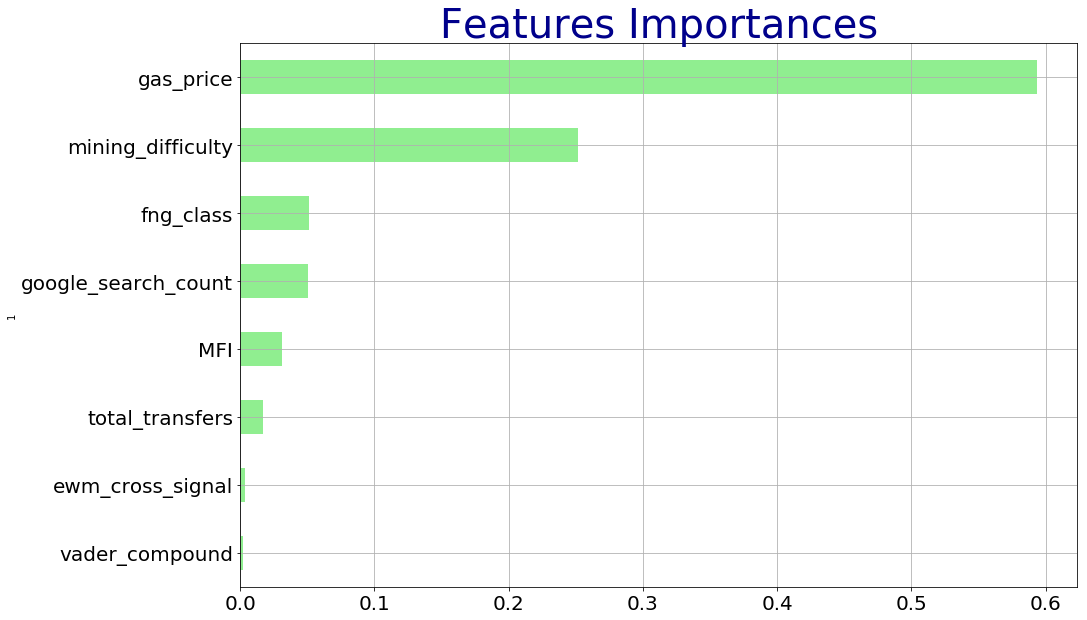

In [32]:
# Visualize the features by importance
importances_df = pd.DataFrame(sorted(zip(rf_model.feature_importances_, X), reverse=True))
importances_df.set_index(importances_df[1], inplace=True)
importances_df.drop(columns=1, inplace=True)
importances_df.rename(columns={0: 'Feature Importances'}, inplace=True)
importances_sorted = importances_df.sort_values(by='Feature Importances')
plt.savefig('features-importance.jpg')
importances_sorted.plot(kind='barh', color='lightgreen', figsize=(15,10), grid=True, 
                        fontsize=20, legend=False)
plt.title('ETH Features Importances', fontsize=40, color='darkBlue', xasis)

In [33]:
# Plot SHAP Values
explainer = shap.TreeExplainer(rf_model)
shap_values = explainer.shap_values(X_test)
plt.savefig('features-importance-shap.jpg')
plt.title('Features Importance SHAP Values', fontsize=25, color='blue', pad=(5.0))
shap.summary_plot(shap_values, X_test)

NameError: name 'shap' is not defined

### Model Evaluation

In [34]:
# r2_score (fit score) test
from sklearn.metrics import r2_score,mean_squared_error
r2_score(y_test, rf_model.predict(X_test))

-0.660570512779628

In [35]:
# r2_score train
r2_score(y_train, rf_model.predict(X_train))

0.9885927363792095

In [36]:
mean_squared_error(y_test, rf_model.predict(X_test))

84379.74903345088

In [37]:
# FIX PERCENTAGE mean squared error
mean_squared_error(y_test, rf_model.predict(X_test), squared=False)

290.4819254849618

In [38]:
mse = mean_squared_error(y_test, rf_model.predict(X_test))

# Using that mean-squared-error, calculate the root-mean-squared error (RMSE):
rolling_mse = np.sqrt(mse)
print(f"MSE: {mse}")
print(f"Rolling MSE: {rolling_mse}")

MSE: 84379.74903345088
Rolling MSE: 290.4819254849618


In [39]:
#eth_master_train_df, eth_master_test_df= np.split(eth_master_df, [int(.8 *len(eth_master_df))])


In [40]:
eth_master_train_df, eth_master_test_df= np.split(eth_master_df, [int(.8 *len(eth_master_df))])
pred_df = pd.DataFrame(predictions, columns=['prediction_price'])
pred_df.index = eth_master_test_df.index
pred_df.head()

,prediction_price
Date,
2020-09-08,337.250
2020-09-09,346.395
2020-09-09,346.395
2020-09-09,346.395
2020-09-09,346.395


In [41]:
#JOIN/MERGE/APPEND dataframes
eth_combined = eth_master_df.join(pred_df)
eth_combined.head()

,close_price,ewm_cross_signal,fng_class,MFI,google_search_count,vader_compound,mining_difficulty,gas_price,total_transfers,prediction_price
Date,,,,,,,,,,
2019-02-11,119.52,1.0,-0.5,39.15,7.0,0.0,0.410002,0.003789,0.193513,NaN
2019-02-12,121.18,1.0,-0.5,49.83,7.0,0.0,0.426929,0.003408,0.152970,NaN
2019-02-13,120.58,1.0,0.0,43.22,7.0,0.0,0.410910,0.004773,0.182555,NaN
2019-02-13,120.58,1.0,0.0,43.22,7.0,0.0,0.410910,0.004773,0.182555,NaN
2019-02-14,119.37,1.0,0.0,45.43,7.0,0.0,0.402840,0.007891,0.167215,NaN


In [42]:
eth_master_pct_change = eth_combined.pct_change()
eth_master_pct_change_corr = eth_master_pct_change.corr()
eth_master_pct_change_corr

,close_price,ewm_cross_signal,fng_class,MFI,google_search_count,vader_compound,mining_difficulty,gas_price,total_transfers,prediction_price
close_price,1.000000,-0.009676,-0.030690,0.432778,0.001115,0.017799,-0.017812,-0.061878,-0.023511,0.033026
ewm_cross_signal,-0.009676,1.000000,0.019358,-0.000209,-0.022831,0.134632,0.037271,-0.005860,-0.124258,-0.039914
fng_class,-0.030690,0.019358,1.000000,0.027450,0.018768,-0.006907,0.001555,-0.014570,-0.041435,-0.047241
MFI,0.432778,-0.000209,0.027450,1.000000,-0.012684,-0.024824,-0.005362,-0.061256,-0.041953,0.012852
google_search_count,0.001115,-0.022831,0.018768,-0.012684,1.000000,0.021154,0.001061,-0.005759,0.098801,0.184432
vader_compound,0.017799,0.134632,-0.006907,-0.024824,0.021154,1.000000,0.007139,-0.030170,-0.094740,0.094102
mining_difficulty,-0.017812,0.037271,0.001555,-0.005362,0.001061,0.007139,1.000000,0.051425,-0.046021,0.082979
gas_price,-0.061878,-0.005860,-0.014570,-0.061256,-0.005759,-0.030170,0.051425,1.000000,0.187840,0.555819
total_transfers,-0.023511,-0.124258,-0.041435,-0.041953,0.098801,-0.094740,-0.046021,0.187840,1.000000,0.497514
prediction_price,0.033026,-0.039914,-0.047241,0.012852,0.184432,0.094102,0.082979,0.555819,0.497514,1.000000


Text(0.5, 1.0, 'Heatmap of LSTM Model Features (ETH)')

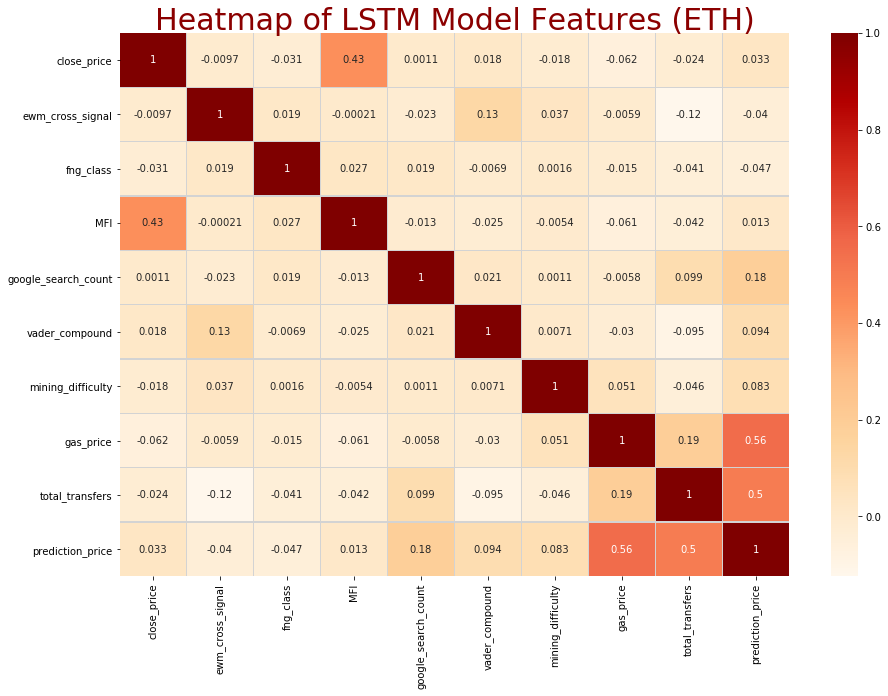

In [43]:
# Plot features importances heatmap
plt.figure(figsize = (15,10))
sns.heatmap(eth_master_pct_change_corr,cmap='OrRd', annot=True, linecolor='lightgray', linewidths=.3)
plt.savefig("rf_heatmap.jpg")
plt.title('Heatmap of LSTM Model Features (ETH)', color='darkred', pad=3.0, fontsize = 30)

---

### RF Analysis for Win/Lose Call Accuracy

In [44]:
#Add column for "actual_day_positive_move" positive move = true & negative move = false
eth_combined["actual_day_positive_move"] = eth_combined["close_price"]-eth_combined["close_price"].shift(1)>0
eth_combined.tail()

,close_price,ewm_cross_signal,fng_class,MFI,google_search_count,vader_compound,mining_difficulty,gas_price,total_transfers,prediction_price,actual_day_positive_move
Date,,,,,,,,,,,
2021-01-12,1049.98,1.0,1.0,57.87,70.0,0.0,0.976442,0.130492,0.389656,297.597,False
2021-01-13,1129.90,1.0,1.0,59.34,70.0,0.0,0.979995,0.097449,0.412667,323.274,True
2021-01-14,1231.08,1.0,1.0,63.03,70.0,0.0,0.982190,0.130189,0.714004,299.824,True
2021-01-15,1168.24,1.0,1.0,60.28,70.0,0.0,0.983228,0.149419,0.396231,297.597,False
2021-01-16,1260.48,1.0,1.0,62.48,70.0,0.0,1.000000,0.124411,0.300899,302.594,True


In [45]:
#Add column for "predicted day positive move" positive move = true & negative move = false
eth_combined["predicted_day_positive_move"] = eth_combined["prediction_price"]-eth_combined["prediction_price"].shift(1)>0
eth_combined.tail()

,close_price,ewm_cross_signal,fng_class,MFI,google_search_count,vader_compound,mining_difficulty,gas_price,total_transfers,prediction_price,actual_day_positive_move,predicted_day_positive_move
Date,,,,,,,,,,,,
2021-01-12,1049.98,1.0,1.0,57.87,70.0,0.0,0.976442,0.130492,0.389656,297.597,False,False
2021-01-13,1129.90,1.0,1.0,59.34,70.0,0.0,0.979995,0.097449,0.412667,323.274,True,True
2021-01-14,1231.08,1.0,1.0,63.03,70.0,0.0,0.982190,0.130189,0.714004,299.824,True,False
2021-01-15,1168.24,1.0,1.0,60.28,70.0,0.0,0.983228,0.149419,0.396231,297.597,False,False
2021-01-16,1260.48,1.0,1.0,62.48,70.0,0.0,1.000000,0.124411,0.300899,302.594,True,True


In [46]:
# Add "correct call" column if both had true or both had false we have a true 
eth_combined["Correct Call Count"] = np.where(eth_combined["actual_day_positive_move"]==eth_combined["predicted_day_positive_move"], True, False)
eth_combined.head()

,close_price,ewm_cross_signal,fng_class,MFI,google_search_count,vader_compound,mining_difficulty,gas_price,total_transfers,prediction_price,actual_day_positive_move,predicted_day_positive_move,Correct Call Count
Date,,,,,,,,,,,,,
2019-02-11,119.52,1.0,-0.5,39.15,7.0,0.0,0.410002,0.003789,0.193513,NaN,False,False,True
2019-02-12,121.18,1.0,-0.5,49.83,7.0,0.0,0.426929,0.003408,0.152970,NaN,True,False,False
2019-02-13,120.58,1.0,0.0,43.22,7.0,0.0,0.410910,0.004773,0.182555,NaN,False,False,True
2019-02-13,120.58,1.0,0.0,43.22,7.0,0.0,0.410910,0.004773,0.182555,NaN,False,False,True
2019-02-14,119.37,1.0,0.0,45.43,7.0,0.0,0.402840,0.007891,0.167215,NaN,False,False,True


In [47]:
#Remove rows w/o predicted prices
rf_eth_calls = eth_combined.iloc[872:]
rf_eth_calls.head()

,close_price,ewm_cross_signal,fng_class,MFI,google_search_count,vader_compound,mining_difficulty,gas_price,total_transfers,prediction_price,actual_day_positive_move,predicted_day_positive_move,Correct Call Count
Date,,,,,,,,,,,,,
2020-09-27,351.90,-1.0,0.0,66.52,6.0,0.0,0.751274,0.106224,0.270217,386.104,False,False,True
2020-09-28,351.90,-1.0,-0.5,62.55,6.0,0.0,0.748886,0.170731,0.345825,365.202,False,False,True
2020-09-29,351.90,-1.0,-0.5,69.89,6.0,0.0,0.747971,0.218155,0.390752,355.424,False,False,True
2020-09-30,359.69,-1.0,0.0,66.14,6.0,0.0,0.754082,0.167510,0.396231,346.395,True,False,False
2020-09-30,359.69,-1.0,0.0,66.14,6.0,0.0,0.754082,0.167510,0.396231,346.395,False,False,True


In [48]:
# convert to pivot table
rf_eth_calls = rf_eth_calls.pivot_table(index=['Correct Call Count'], aggfunc='size')
rf_eth_calls

Correct Call Count
False     60
True     103
dtype: int64

In [49]:
# calculate lose rate
rf_eth_calls['lose_rate'] = (rf_eth_calls.iloc[0] / (163))*100
rf_eth_calls

Correct Call Count
False         60.000000
True         103.000000
lose_rate     36.809816
dtype: float64

In [50]:
# calculate win rate
rf_eth_calls['win_rate'] = (rf_eth_calls.iloc[1] / (163))*100
rf_eth_calls

Correct Call Count
False         60.000000
True         103.000000
lose_rate     36.809816
win_rate      63.190184
dtype: float64

---

## Features Decision Tree

In [51]:
from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor
from sklearn.datasets import load_iris
from sklearn import tree
import pydotplus
from IPython.display import Image

In [52]:
# Prepare the data
dataset = eth_combined
X = eth_combined[['close_price','ewm_cross_signal','fng_class','MFI','google_search_count', 'vader_compound', 'mining_difficulty', 'gas_price', 'total_transfers']]
y = eth_combined["close_price"].ravel()

In [53]:
# Fit the regressor, set max_depth = 3
regr = DecisionTreeRegressor(max_depth=3, min_samples_leaf=25, random_state=78)
model = regr.fit(X, y)

Text(0.5, 1.0, 'Features Decision Tree')

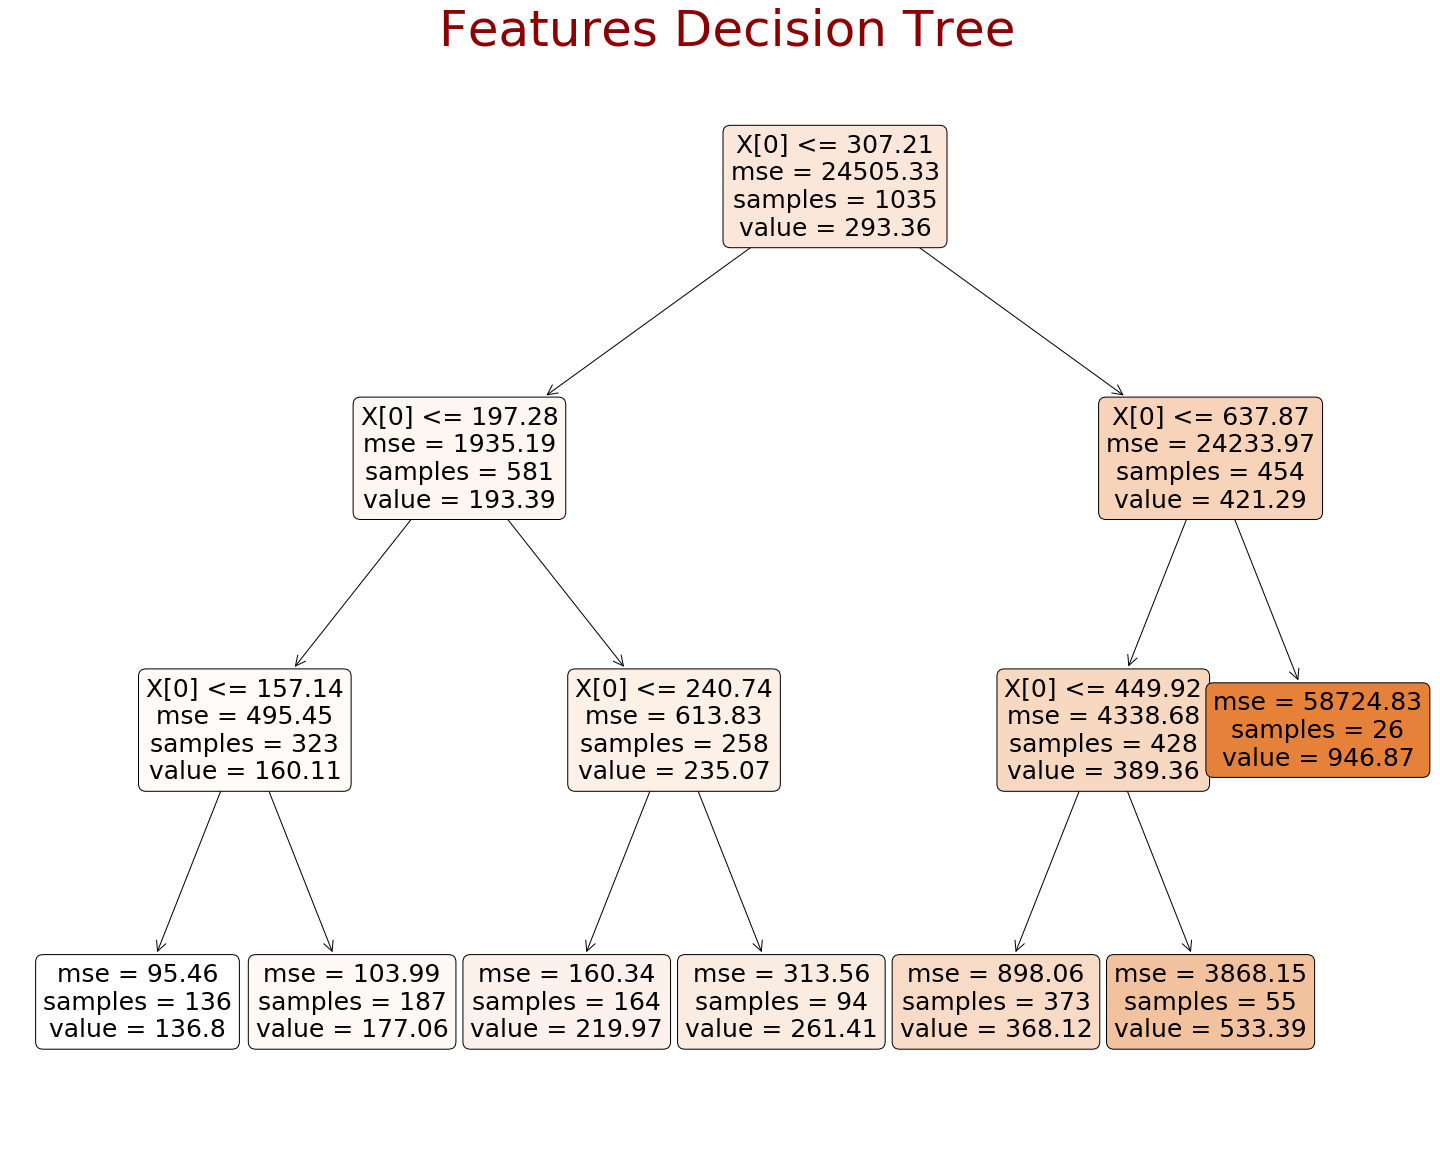

In [54]:
fig = plt.figure(figsize=(25,20))
plt.savefig('decision-tree.jpg')
fig = tree.plot_tree(regr, filled=True, rounded=True, precision=2, fontsize=25)
plt.title('Features Decision Tree', fontsize=50, color='darkred')

In [55]:
eth_combined = eth_master_df.join(pred_df)
eth_combined.head()

,close_price,ewm_cross_signal,fng_class,MFI,google_search_count,vader_compound,mining_difficulty,gas_price,total_transfers,prediction_price
Date,,,,,,,,,,
2019-02-11,119.52,1.0,-0.5,39.15,7.0,0.0,0.410002,0.003789,0.193513,NaN
2019-02-12,121.18,1.0,-0.5,49.83,7.0,0.0,0.426929,0.003408,0.152970,NaN
2019-02-13,120.58,1.0,0.0,43.22,7.0,0.0,0.410910,0.004773,0.182555,NaN
2019-02-13,120.58,1.0,0.0,43.22,7.0,0.0,0.410910,0.004773,0.182555,NaN
2019-02-14,119.37,1.0,0.0,45.43,7.0,0.0,0.402840,0.007891,0.167215,NaN


----

## LSTM Recurrent Neural Network for Historical and Predicted Closing Prices

In [56]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from numpy.random import seed
from tensorflow import random

In [57]:
# Set the random seed for reproducibility
seed(1)
random.set_seed(2)

In [58]:
# Create function for features (X) and targeet(y)
def window_data(eth_combined, window, feature_col_number, target_col_number):
    X = []
    y = []
    for i in range(len(eth_combined) - window - 1):
        features = eth_combined.iloc[i:(i + window), feature_col_number]
        target = eth_combined.iloc[(i + window), target_col_number]
        X.append(features)
        y.append(target)
    return np.array(X), np.array(y).reshape(-1, 1)

In [59]:
# Predict Closing Prices 
window_size = 10

# Column 0 is `Close Price`
feature_column = 0
target_column = 0
X, y = window_data(eth_combined, window_size, feature_column, target_column)

In [60]:
# Use 70% of the data for training and the remainder for testing
split = int(0.7 * len(X))
X_train = X[: split]
X_test = X[split:]
y_train = y[: split]
y_test_scaler = y[split:]

In [61]:
from sklearn.preprocessing import MinMaxScaler
# Use the MinMaxScaler to scale data between 0 and 1.
scaler = MinMaxScaler()
scaler.fit(X)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
scaler.fit(y)
y_train = scaler.transform(y_train)
y_test_scaler = scaler.transform(y_test_scaler)


In [62]:
# Reshape the features for the model
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

---

### Build and Train the Model

In [63]:
# Define the LSTM RNN model.
model = Sequential()

# Initial model setup
number_units = 30
dropout_fraction = 0.2

# Layer 1
model.add(LSTM(
    units=number_units,
    return_sequences=True,             #carries the values forward
    input_shape=(X_train.shape[1], 1))
    )
model.add(Dropout(dropout_fraction))
# Layer 2
model.add(LSTM(units=number_units, return_sequences=True))
model.add(Dropout(dropout_fraction))
# Layer 3
model.add(LSTM(units=number_units))
model.add(Dropout(dropout_fraction))
# Output layer
model.add(Dense(1))


In [64]:
# Compile the model
model.compile(optimizer="adam", loss="mean_squared_error")

In [65]:
# Summarize the model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 10, 30)            3840      
_________________________________________________________________
dropout (Dropout)            (None, 10, 30)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 10, 30)            7320      
_________________________________________________________________
dropout_1 (Dropout)          (None, 10, 30)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 30)                7320      
_________________________________________________________________
dropout_2 (Dropout)          (None, 30)                0         
_________________________________________________________________
dense (Dense)                (None, 1)                 3

In [66]:
# Train the model
model.fit(X_train, y_train, epochs=50, shuffle=False, batch_size=100, verbose=0)

---

### Model Performance

In [67]:
# Evaluate the model
model.evaluate(X_test, y_test_scaler)

10/10 [==============================] - 4s 14ms/step - loss: 0.0040


0.00400088494643569

In [68]:
# Make some predictions
predicted = model.predict(X_test)

In [69]:
# Recover the original prices instead of the scaled version
predicted_prices = scaler.inverse_transform(predicted)
real_prices = scaler.inverse_transform(y_test_scaler.reshape(-1, 1))

In [70]:
# Create a DataFrame of Real and Predicted values
lstm = pd.DataFrame({
    "Real": real_prices.ravel(),
    "Predicted": predicted_prices.ravel()
}, index = eth_combined.index[-len(real_prices): ]) 
lstm.head()

,Real,Predicted
Date,,
2020-09-09,351.29,345.492035
2020-09-09,351.29,345.492035
2020-09-09,351.29,345.492035
2020-09-09,351.29,345.492035
2020-09-09,351.29,345.492035


Text(0.5, 1.0, 'Ethereum Historical Real Price vs. Predicted Price')

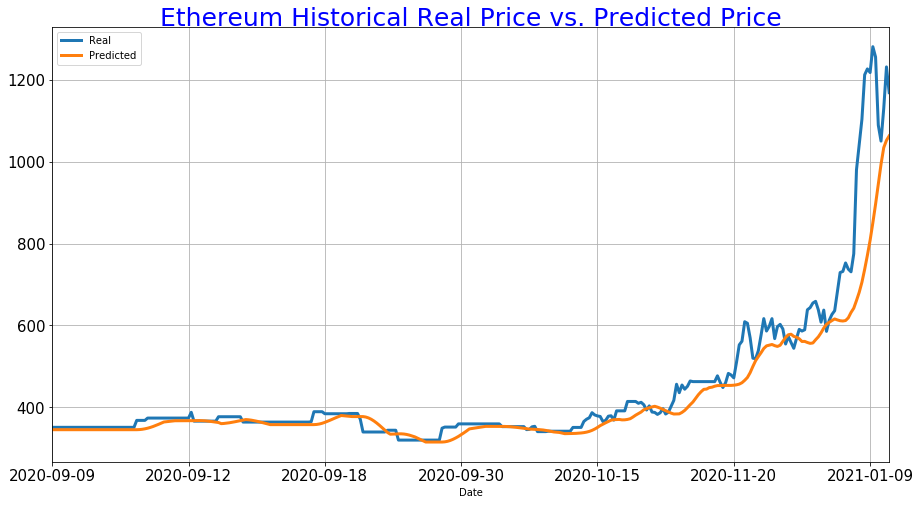

In [71]:
# Plot price comparison
lstm.plot(figsize=(15,8), fontsize=15, grid=True, linewidth=3)
plt.savefig('lstm.jpg')
plt.title('Ethereum Historical Real Price vs. Predicted Price', fontsize=25, 
          fontweight=15, color='blue', pad=1.0)

In [72]:
lstm["actual_day_positive_move"] = lstm["Real"]-lstm["Real"].shift(1)>0
lstm.tail()

,Real,Predicted,actual_day_positive_move
Date,,,
2021-01-12,1088.94,945.199524,False
2021-01-13,1049.98,993.330200,False
2021-01-14,1129.90,1034.123901,True
2021-01-15,1231.08,1051.731445,True
2021-01-16,1168.24,1062.814453,False


In [73]:
lstm["predicted_day_positive_move"] = lstm["Predicted"]-lstm["Predicted"].shift(1)>0
lstm.tail()

,Real,Predicted,actual_day_positive_move,predicted_day_positive_move
Date,,,,
2021-01-12,1088.94,945.199524,False,True
2021-01-13,1049.98,993.330200,False,True
2021-01-14,1129.90,1034.123901,True,True
2021-01-15,1231.08,1051.731445,True,True
2021-01-16,1168.24,1062.814453,False,True


In [74]:
lstm["Call Accuracy Count"] = np.where(lstm["actual_day_positive_move"]==lstm["predicted_day_positive_move"], True, False)
lstm.tail()

,Real,Predicted,actual_day_positive_move,predicted_day_positive_move,Call Accuracy Count
Date,,,,,
2021-01-12,1088.94,945.199524,False,True,False
2021-01-13,1049.98,993.330200,False,True,False
2021-01-14,1129.90,1034.123901,True,True,True
2021-01-15,1231.08,1051.731445,True,True,True
2021-01-16,1168.24,1062.814453,False,True,False


In [75]:
lstm = lstm.pivot_table(index=['Call Accuracy Count'], aggfunc='size')
lstm_pivot = lstm
lstm_pivot

Call Accuracy Count
False    134
True     174
dtype: int64

In [76]:
# calculate lose rate
lstm_pivot['lose_rate'] = (lstm_pivot.iloc[0] / (308))*100
lstm_pivot
#stock_pivot['win_rate'] = (stock_pivot.iloc[1] / (308))*100
#print("f: The LSTM win rate is "{stock_pivot}".")

Call Accuracy Count
False        134.000000
True         174.000000
lose_rate     43.506494
dtype: float64

In [77]:
# calculate win rate
lstm_pivot['win_rate'] = (lstm_pivot.iloc[1] / (308))*100
lstm_pivot

Call Accuracy Count
False        134.000000
True         174.000000
lose_rate     43.506494
win_rate      56.493506
dtype: float64

---

## Which Model Had the Best Call Accuracy Rate?

In [78]:
combined_pivot = pd.concat([rf_eth_calls, lstm_pivot], axis=1, keys=['Random Forest Calls', 'LSTM RNN Calls'], join='inner')
combined_pivot

,Random Forest Calls,LSTM RNN Calls
False,60.000000,134.000000
True,103.000000,174.000000
lose_rate,36.809816,43.506494
win_rate,63.190184,56.493506


Text(0.5, 1.0, 'Win/Lose Call Accuracy by Model')

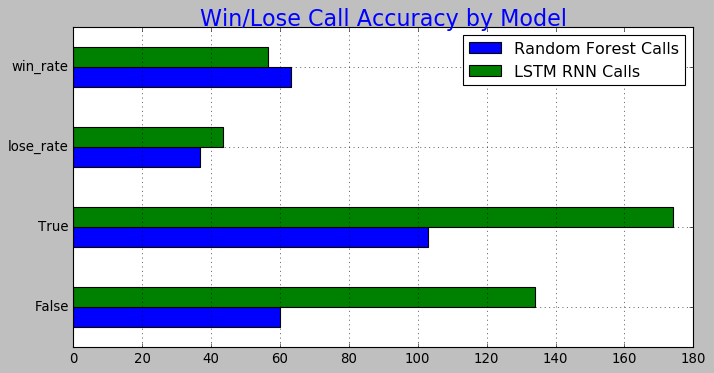

In [79]:
# Plot call accuracy by model
plt.style.use('classic')
combined_pivot.plot(kind='barh', figsize=(10,5), fontsize=12, grid=True)
plt.savefig('win-lose-compare.jpg')
plt.title('Win/Lose Call Accuracy by Model', fontsize=20, fontweight=15, color='blue', pad=1.0)

##### 